<a href="https://colab.research.google.com/github/Akshay-Malwade/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

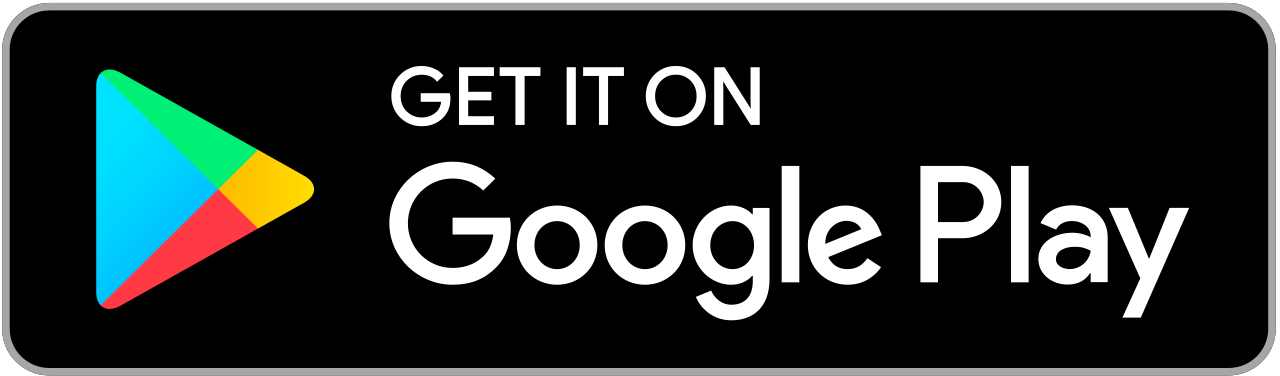

### **1. INTRODUCTION TO DATA**

Firstly let's get to know data. Initially to have lookup over the data we need pandas library.

In [4]:
#Importing necesssary libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
# word cloud library
from wordcloud import WordCloud

In [26]:
# Read the csv File
data = pd.read_csv('/content/Play Store Data.csv')

In [6]:
data.info() # This shows the datatype of each feature and also we get to know if any missing values are present in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
data.columns # Displays all the columns from dataset.

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [27]:
data.shape # displays the total no of rows and columns present in dataset.

(10841, 13)

In [14]:
type(data) # type of the variable data

pandas.core.frame.DataFrame

In [10]:
data.head() #displays the first five instances.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
data.tail() #displays the last five instances.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


### **2. Cleaning Data**
Dataset can contain missing data, numerical string value, various cues. Cleaning helps us to make data analysis in easy way.
So, Let's explore all columns one by one and check for invalid data and then clean the data accordingly.

### **APP Column:**
Check for duplicate values in App column if any then drop those rows.

In [15]:
data['App'].value_counts() ## Returns the count of all the unique values for app column.


ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
ESPN                                                 7
                                                    ..
BlackJack 21 Pro                                     1
Easy Cv maker 2018                                   1
Friend Find: free chat + flirt dating app            1
Bathroom Decorating Ideas                            1
Cozi Family Organizer                                1
Name: App, Length: 9660, dtype: int64

In [29]:
# remove the duplicate values from the dataframe, specifying the column name in the subset parameter 
data = data.drop_duplicates(subset=['App'], keep = 'first')

In [22]:
data['App'].value_counts() # for Rechecking.

Hey AJ! It's Bedtime!                               1
Myth Defense 2: DF                                  1
Ambulance Simulator 3D                              1
Dirt Trackin Sprint Cars                            1
Permit Test FL Florida DHSMV                        1
                                                   ..
CG Patwari Exam                                     1
Piano Kids - Music & Songs                          1
Bounce Classic                                      1
Q downloader : download your social media videos    1
Talkatone: Free Texts, Calls & Phone Number         1
Name: App, Length: 9660, dtype: int64

In [30]:
# Recheck the shape of the data to validate the updation.
data.shape

(9660, 13)

### **Category Column:**
Check for unique categories.

In [23]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

As we can see 1.9 is wrong category present in dataset which we is invalid.So, Need to check the observation entry for that category.


In [24]:
data[data.Category == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


So, Here we got the index position for that particular wrong entry.
So, lets remove it.

In [31]:
# remove the row with the specified index; axis 0 implies along the rows; axis 1 along the columns
data=data.drop([10472],axis=0)

In [33]:
data.shape

(9659, 13)

## Rating Column:
Check for valid rating values.

In [34]:
data['Rating'].describe() # statistical summary of the rating column.

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

All the rating values are within the range.But the count of rating values is 8196 where as we have 9659 entries in our dataset. It shows that there are missing values in 'Rating Column. Lets check for the Missing Values.